In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.save_weights('cifar10-weight-cnn.h5')

hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 142s 90ms/step - loss: 1.7633 - accuracy: 0.3493 - val_loss: 1.1312 - val_accuracy: 0.5958
Epoch 2/50
1563/1563 [==============================] - 129s 83ms/step - loss: 1.1637 - accuracy: 0.5853 - val_loss: 0.9700 - val_accuracy: 0.6618
Epoch 3/50
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9888 - accuracy: 0.6517 - val_loss: 0.9156 - val_accuracy: 0.6789
Epoch 4/50
1563/1563 [==============================] - 137s 87ms/step - loss: 0.8925 - accuracy: 0.6852 - val_loss: 0.7861 - val_accuracy: 0.7275
Epoch 5/50
1563/1563 [==============================] - 137s 88ms/step - loss: 0.8207 - accuracy: 0.7123 - val_loss: 0.7400 - val_accuracy: 0.7490
Epoch 6/50
1563/1563 [==============================] - 138s 89ms/step - loss: 0.7641 - accuracy: 0.7339 - val_loss: 0.7546 - val_accuracy: 0.7397
Epoch 7/50
1563/1563 [==============================] - 138s 88ms/step - loss: 0.7340 - accuracy: 0.7446 - val_loss: 0

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 6s 19ms/step - loss: 0.6907 - accuracy: 0.7968
正解率= 0.7968000173568726 loss= 0.6906844973564148


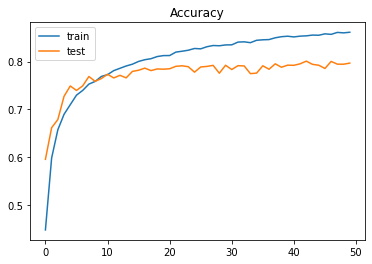

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

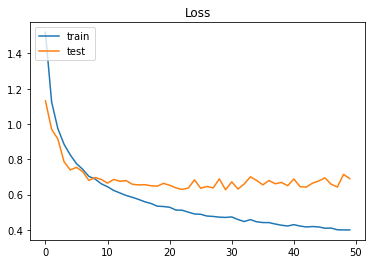

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()